# Business Understanding

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Data Understanding

# Data Preparation

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [42]:
df.shape

(90348, 31)

Cleaning up Fatalities

In [43]:
df['Total.Fatal.Injuries'].dropna(inplace=True)

## Cleaning Make

In [44]:
df['Make'].head(10)

0              Stinson
1                Piper
2               Cessna
3             Rockwell
4               Cessna
5    Mcdonnell Douglas
6               Cessna
7               Cessna
8               Cessna
9       North American
Name: Make, dtype: object

In [45]:
df['Make'].describe()

count      88826
unique      8237
top       Cessna
freq       22227
Name: Make, dtype: object

In [46]:
df['Make'].isna().sum()

1522

In [47]:
df['Make'].dropna(inplace=True)

In [48]:
# 
name_changes = {'CESSNA': 'Cessna', 'PIPER': 'Piper', 'BEECH': 'Beech',
 'BOEING': 'Boeing', 'BELL': 'Bell', 'MOONEY': 'Mooney','ROBINSON':'Robinson',
 'ROBINSON HELICOPTER COMPANY':'Robinson Helicopter Company','ROBINSON HELICOPTER':'Robinson Helicopter Company',
 'SCHWEIZER':'Schweizer',}
for old_value, new_value in name_changes.items():
    df['Make'] = df['Make'].replace(old_value, new_value)

In [49]:
df['Make'].value_counts()

Cessna              27149
Piper               14870
Beech                5372
Boeing               2745
Bell                 2722
                    ...  
Sukane                  1
Hudspeth Shawn D        1
Joy                     1
MOSIER ROBERT S         1
Lightcap                1
Name: Make, Length: 8227, dtype: int64

In [50]:
make_counts = df['Make'].value_counts()

In [51]:
valid_make = make_counts[make_counts > 100].index

In [52]:
filtered_make = df[df['Make'].isin(valid_make)]

In [53]:
filtered_make['Make'].value_counts()

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Mooney                             1334
Robinson                           1230
Grumman                            1094
Bellanca                            886
Hughes                              795
Schweizer                           773
Air Tractor                         595
Mcdonnell Douglas                   526
Aeronca                             487
Maule                               445
Champion                            428
Robinson Helicopter Company         415
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [54]:
make_and_fatalities = filtered_make[['Make','Total.Fatal.Injuries']]

In [55]:
grouped = make_and_fatalities.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()

In [56]:
filtered_make_counts = filtered_make['Make'].value_counts().reset_index()
filtered_make_counts.columns = ['Make','Total Flights']

In [57]:
result = pd.merge(grouped, filtered_make_counts, on='Make', how='left', suffixes=('_grouped', ''))

In [58]:
result = result[['Make','Total Flights','Total.Fatal.Injuries']]

In [59]:
result

,Make,Total Flights,Total.Fatal.Injuries
0,AERONCA,149,23.0
1,AIR TRACTOR INC,217,40.0
2,AIRBUS,251,1212.0
3,Aero Commander,360,222.0
4,Aeronca,487,95.0
5,Aerospatiale,342,311.0
6,Air Tractor,595,84.0
7,Airbus Industrie,142,1024.0
8,Aviat,112,16.0
9,Ayres,215,38.0


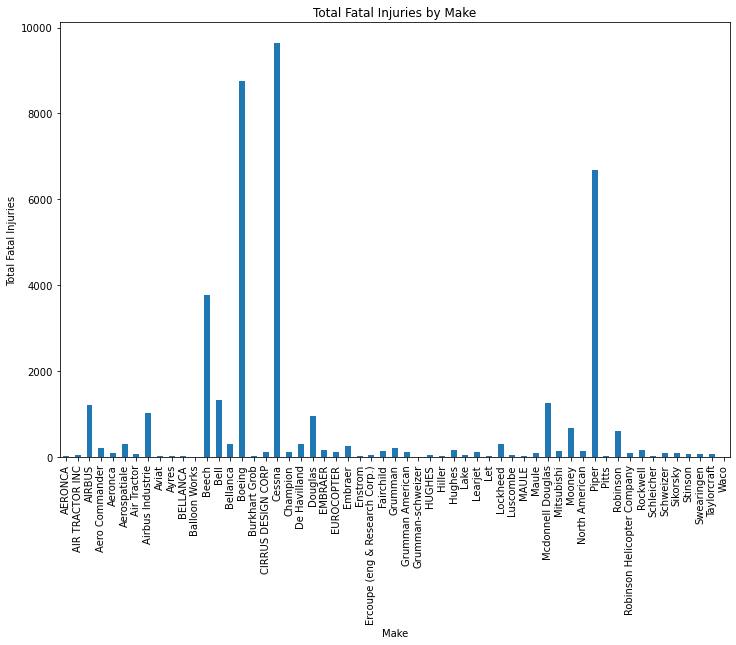

In [60]:
result.plot(kind='bar', x='Make', y='Total.Fatal.Injuries', legend=False, figsize=(12, 8))
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Make')
plt.show()

## Cleaning Models

In [71]:
df['Model'].head(10)

0           108-3
1        PA24-180
2            172M
3             112
4             501
5             DC9
6             180
7             140
8            401B
9    NAVION L-17B
Name: Model, dtype: object

In [72]:
df['Model'].value_counts()

152             2367
172             1756
172N            1164
PA-28-140        932
150              829
                ... 
FOKKER DR. 1       1
BH-47G             1
BE-55E             1
BAE 125 800        1
CHRISTAVIA         1
Name: Model, Length: 12318, dtype: int64

In [73]:
df['Model'].isna().sum()

1551

In [78]:
model_dropped = df['Model'].dropna()

In [12]:
df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [14]:
df['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

# Exploratory Data Analysis

# Conclusion

## Limitations

## Recommendations

## Next Steps